In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
import tqdm
sns.set()

import scipy

# Distribución de 100 intervalos de confianza

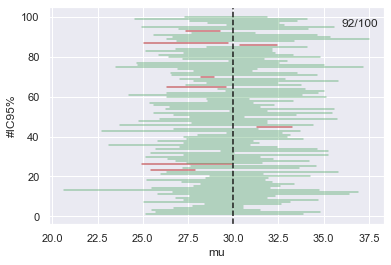

In [119]:
mu = 30
sigma = 3
n = 5
t_005 = scipy.stats.t.ppf(0.975, df = n - 1)

fig, ax = plt.subplots()
mu_in = 0
#Construyo 100 IC al 95% tomando una muestra de n valores
for i in range(1, 101):
    sample = np.random.normal(loc = mu, scale = sigma, size = n)
    x_bar = np.mean(sample)
    x_std = np.std(sample)
    ic_lo = x_bar - t_005*x_std/np.sqrt(n)
    ic_hi = x_bar + t_005*x_std/np.sqrt(n)
    if mu >= ic_lo and mu <= ic_hi:
        ax.plot([ic_lo, ic_hi], [i, i], 'g', alpha = 0.5)
        mu_in += 1
    else:
        ax.plot([ic_lo, ic_hi], [i, i], 'r', alpha = 0.8)
plt.axvline(x = 30, ymin = 0, ymax = 101, color ='k', linestyle = '--')
plt.xlabel('mu')
plt.ylabel('#IC95%')
text = str(mu_in)+ '/100'
plt.annotate(s = text, xy = (36, 95));

# Distribución empírica

In [112]:
mu = 30
sigma = 3
n = 5
t_005 = scipy.stats.t.ppf(0.975, df = n - 1)
mu_in_vals = []

#Repito 100000 la construccion de 100 intervalos de confianza, 
#contando la cantidad de intevalos que contienen a mu
for _ in tqdm.tqdm(range(100000)):
    
    mu_in = 0
    
    #Construyo 100 IC al 95% tomando una muestra de n valores
    for i in range(1, 101):
        sample = np.random.normal(loc = mu, scale = sigma, size = n)
        x_bar = np.mean(sample)
        x_std = np.std(sample)
        tsn = t_005*x_std/np.sqrt(n)
        
        ic_lo = x_bar - tsn
        ic_hi = x_bar + tsn
        
        if mu >= ic_lo and mu <= ic_hi:
            mu_in += 1
            
    mu_in_vals.append(mu_in)

100%|██████████| 100000/100000 [08:09<00:00, 204.14it/s]


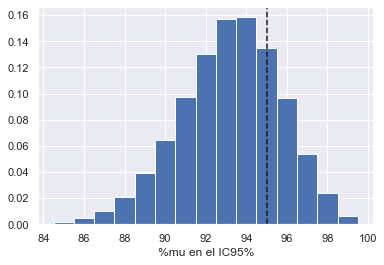

In [116]:
bins = [i - 0.5 for i in range(85,101)]   
plt.hist(mu_in_vals, bins = bins, density=True)
plt.xlabel('%mu en el IC95%')
plt.axvline(x = 95, ymin = 0, ymax = 1, color ='k', linestyle = '--');